# Creating train test splits for property prediction

In [ ]:
try:
    from google.colab import drive
    drive.mount("data", force_remount=True)
    wd = "data/Shared drives/Villen_Lab/Anthony Valente/PhosphopediaNotebook/"

except e:
    print(e)
    wd = "./"

Mounted at data


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

## Intro

Along similar lines to other publications in this field, I will split peptides based on underlying sequence. I will attempt to use the same splits for any other peptide properties that we predict as well. I hope this will give some consistency to the choice, even if the final filtered subsets used for training slightly differ.

## Data Split

In order to maximize the amount of data available for training, I will use a 10% test split, and then subsequently take 10% for validation, leaving an 80% test split.

#### Retention time data

In [ ]:
rt_data = pd.read_csv(wd + "data/processed/human_phospho/update_20210902/peptides.csv")
rt_data = rt_data[["sequence", "learned_rt", "qvalue", "hits", "test_error"]]

np.random.seed(98115)
indices = np.arange(rt_data.shape[0])
np.random.shuffle(indices)

rt_train_peptides = rt_data.iloc[indices[:int(.8*rt_data.shape[0])]]
rt_valid_peptides = rt_data.iloc[indices[int(.8*rt_data.shape[0]):int(.9*rt_data.shape[0])]]
rt_test_peptides = rt_data.iloc[indices[int(.9*rt_data.shape[0]):]]

In [ ]:
os.makedirs(wd + "data/modeling_splits/update_20210902/", exist_ok=True)
rt_train_peptides.to_csv(wd + "data/modeling_splits/update_20210902/retention_time_train.csv")
rt_valid_peptides.to_csv(wd + "data/modeling_splits/update_20210902/retention_time_valid.csv")
rt_test_peptides.to_csv(wd + "data/modeling_splits/update_20210902/retention_time_test.csv")

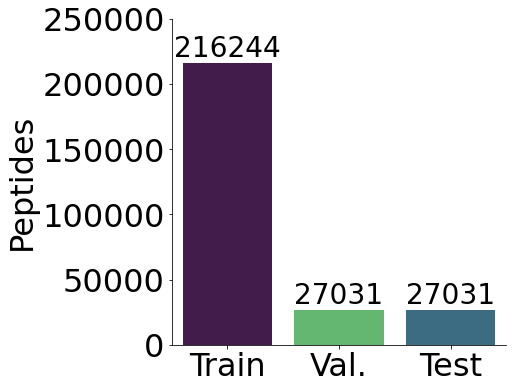

In [ ]:
fig = plt.figure(figsize=(6, 6))

peptide_counts = [rt_train_peptides.shape[0], rt_valid_peptides.shape[0], rt_test_peptides.shape[0]]

sns.barplot(x=["Train", "Val.", "Test"],
            y=peptide_counts,
            palette=["#461554", "#56c566", "#30708d"])

for x, c in zip([0, 1, 2], peptide_counts):
    plt.text(x, c + 5000, str(c),
             size=28,
             ha="center")

plt.yticks([0, 50000, 100000, 150000, 200000, 250000])
plt.tick_params(labelsize=32)
plt.xlabel("", size=32)
plt.ylabel("Peptides", size=32)
fig.get_axes()[0].spines["right"].set_visible(False)
fig.get_axes()[0].spines["top"].set_visible(False)

plt.savefig(wd + "figures/rt_data_split.svg",
            bbox_inches="tight")
plt.show()